# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
city_freq = kill.city.value_counts()[:12]
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

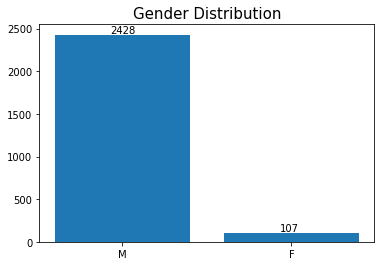

In [244]:
fig, ax = plt.subplots()
gendr_indx=kill.gender.value_counts().index
gendr_val = kill.gender.value_counts().values
ax.bar(gendr_indx, gendr_val)
ax.set_title("Gender Distribution",fontsize = 15)


for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.33, i.get_height()+20))

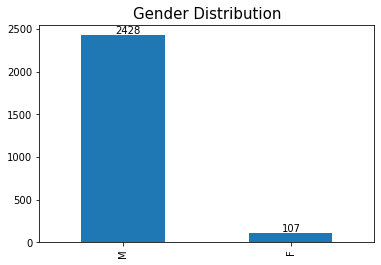

In [254]:
# with pandas
fig, ax = plt.subplots()

kill.gender.value_counts().plot(kind = "bar", ax=ax)

ax.set_title("Gender Distribution", fontsize=15)

for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.2,i.get_height()+20))

## 2: Plot 7 most common kill weapons

In [261]:
kill.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [263]:
x = kill.armed.value_counts().head(7).index
y = kill.armed.value_counts().head(7).values

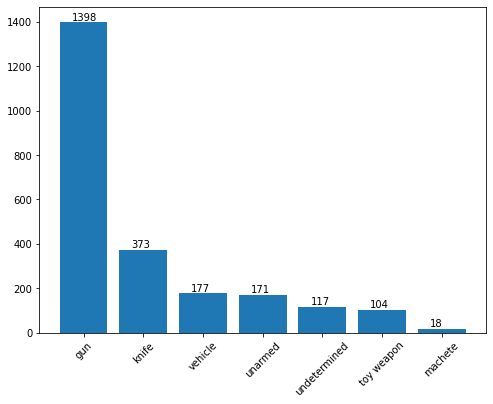

In [279]:
fig, ax = plt.subplots(figsize = (8,6))

ax.bar(x,y)
ax.set_xticklabels(x, rotation =45)

for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.2,i.get_height()+10))

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [280]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [303]:
kill["age_cat"] =kill.age.apply(lambda x: "above 25" if x>=25 else ("below25" if x<25 else "Other"))

In [283]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above 25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above 25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above 25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above 25


In [304]:
kill.age_cat.value_counts()

above 25    2008
below25      450
Other         77
Name: age_cat, dtype: int64

In [305]:
a = kill.age_cat.value_counts().index
b = kill.age_cat.value_counts().values

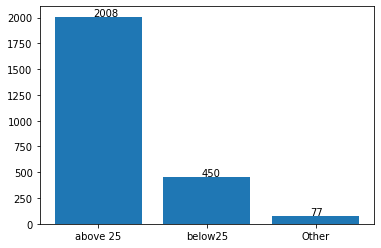

In [306]:
fig, ax = plt.subplots()

ax.bar(a,b)

for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.35,i.get_height()+10))

## 4: Plot number of killed poeple by race

In [308]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [311]:
kill_race_ind =kill.race.value_counts().index
kill_race_val = kill.race.value_counts().values


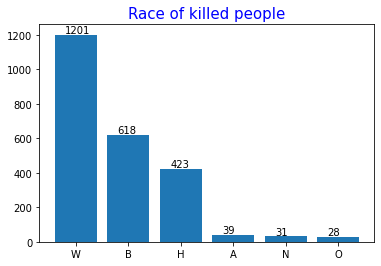

In [328]:
# with matplotlib
fig, ax = plt.subplots()

ax.bar(kill_race_ind,kill_race_val)
ax.set_title("Race of killed people",fontsize=15,color="blue")

for i in ax.patches:
    ax.annotate((i.get_height()),(i.get_x()+0.2,i.get_height()+10));

## 5: Killed People According to Races (Pie Chart)

In [329]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above 25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above 25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above 25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above 25


In [335]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [337]:
kill.race.value_counts(dropna = False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [338]:
kill.dropna(inplace=True)

In [340]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [341]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [352]:
race_indx = kill.race.value_counts().index

In [353]:
race_val=kill.race.value_counts().values

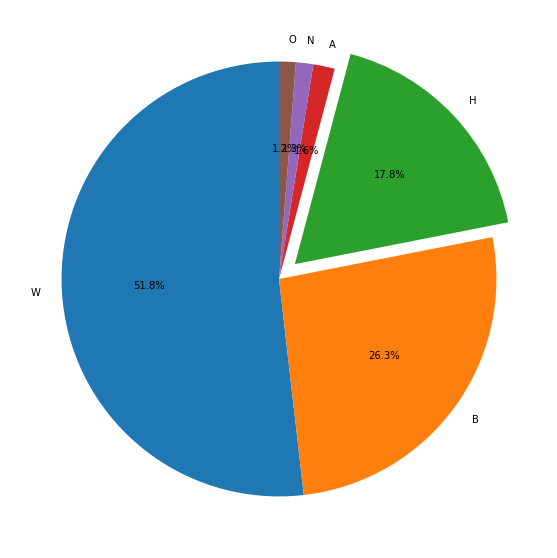

In [363]:
# matplotlib
explode = (0,0,0.1,0,0,0)

fig, ax = plt.subplots(figsize=(10,10))

ax.pie(x=race_val,
        explode= explode,
        labels=race_indx,
        autopct="%.1f%%",
        startangle=90);
